<h1>Problem Description</h1>
<p>A scientist is interested to investigate the effectiveness of online education.  Write a scientific report for that scientist after analyzing the following dataset. 

You have a subset of the real data set contained information of 50 students who are attending online classes. To select appropriate statistical tools for analyzing data, at first explore all variables by using appropriate graphical presentation and frequency tables. Don't forget to make comments or remarks for each graph and table. Secondly, investigate the significant association among demographical variables with online education-related variables. Thirdly, try to find the key significate factors which influence the positive and negative effect on online education using sophisticated data mining tools. Finally, you can apply cluster analysis for finding the groups of respondents. In the "discussion and conclusions" section, try to highlight the limitations and key points for improving the online education system. 

N.B. Don't forget to put your R/Python Code in the Appendix. This Homework is due on Wednesday, December 15, 2020. You can do this by an individual or a group of at most four members. Please upload the solution to this project on google classroom.</p>

<h1>Data Visualization</h1>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
data=pd.read_csv("C:/Users/sadat/OneDrive/Desktop/Data Science 3rd Semester/DM Assignment/201900101002.csv")
data
data.head()


,Timestamp,Your Gender Name,Your Age in Years,Your Permanent Resident Area,Monthly Cost for Buying Internet with Mobile Data,Monthly Cost for only Phone/Mobile Call,"How much time do you spend daily on social media e.g., Facebook? - In Minutes",Do you find it difficult to manage your expenses for your study?,Household Monthly Income,Are you attending online classes regularly?,...,Online course interaction The lecture material in my online courses is valuable to course discussions.,Online course content and satisfaction The materials in my online courses support the course goals.,Online course content and satisfaction The class video recording is not so important for me.,Online course content and satisfaction On-campus class face-to-face class and online class are the same for me.,Online course content and satisfaction I think I learn more in online classes than in on-campus classes face-to-face classes.,Online course content and satisfaction I prefer online courses to on-campus classes face-to-face classes.,Assignment and Homework for Online Class I want to receive homework for my online course.,Assignment and Homework for Online Class I want to receive the assignment for my online course.,Assignment and Homework for Online Class I want to participate in the online exam.,Assignment and Homework for Online Class I want to participate in the quiz in the online class.
0,10/22/2020 14:13,Male,24,Rural,500,200,480,Yes,40000,Yes,...,Strongly agree,Agree,Strongly agree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,10/22/2020 14:14,Female,20,Urban,1000,200,420,No,50000,Yes,...,Agree,Agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree
2,10/22/2020 14:20,Male,21,Semi-urban,1000,500,480,Yes,22000,Yes,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly disagree,Agree
3,10/22/2020 14:21,Female,20,Urban,500,100,240,No,20000,Yes,...,Agree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Agree,Agree,Agree
4,10/22/2020 14:23,Female,21,Urban,500,100,180,No,50000,Yes,...,Strongly agree,Agree,Disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree


In [78]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('(', '')
data.columns = data.columns.str.replace(')', '')
data
data.head()

,Timestamp,Your_Gender_Name,Your_Age_in_Years,Your_Permanent_Resident_Area,Monthly_Cost_for_Buying_Internet_with_Mobile_Data,Monthly_Cost_for_only_Phone/Mobile_Call,"How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes",Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?,Household_Monthly_Income,Are_you_attending_online_classes_regularly?,...,Online_course_interaction_The_lecture_material_in_my_online_courses_is_valuable_to_course_discussions.,Online_course_content_and_satisfaction_The_materials_in_my_online_courses_support_the_course_goals.,Online_course_content_and_satisfaction_The_class_video_recording_is_not_so_important_for_me.,Online_course_content_and_satisfaction_On-campus_class_face-to-face_class_and_online_class_are_the_same_for_me.,Online_course_content_and_satisfaction_I_think_I_learn_more_in_online_classes_than_in_on-campus_classes_face-to-face_classes.,Online_course_content_and_satisfaction_I_prefer_online_courses_to_on-campus_classes_face-to-face_classes.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_homework_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_the_assignment_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want__to_participate_in_the_online_exam.,Assignment_and_Homework_for_Online_Class_I_want_to_participate_in_the_quiz_in_the_online_class.
0,10/22/2020 14:13,Male,24,Rural,500,200,480,Yes,40000,Yes,...,Strongly agree,Agree,Strongly agree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,10/22/2020 14:14,Female,20,Urban,1000,200,420,No,50000,Yes,...,Agree,Agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree
2,10/22/2020 14:20,Male,21,Semi-urban,1000,500,480,Yes,22000,Yes,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly disagree,Agree
3,10/22/2020 14:21,Female,20,Urban,500,100,240,No,20000,Yes,...,Agree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Agree,Agree,Agree
4,10/22/2020 14:23,Female,21,Urban,500,100,180,No,50000,Yes,...,Strongly agree,Agree,Disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree


In [79]:
data.columns

Index(['Timestamp', 'Your_Gender_Name', 'Your_Age_in_Years',
       'Your_Permanent_Resident_Area',
       'Monthly_Cost_for_Buying_Internet_with_Mobile_Data',
       'Monthly_Cost_for_only_Phone/Mobile_Call',
       'How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes',
       'Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?',
       'Household_Monthly_Income',
       'Are_you_attending_online_classes_regularly?',
       'Have_you_experienced_any_physical_problems_due_to_online_classes?',
       'If_you_face_any_physical_problem,_then_what's_kind_of_problems_have_you_encountered?',
       'What_device_do_you_use_for_the_online_class?',
       'How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour',
       'How_effective_has_remote_learning_been_for_you?',
       'How_helpful_your_university_has_been_in_offering_you_the_resources_to_learn_from_home?',
       'How_well_could_you_manage_time_while_learning_remotely?_Con

In [80]:
print(data.How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour.to_string(index=False))

   3to5
   3to5
   1to3
   3to5
   3to5
   5to7
   1to3
   1to3
   3to5
   3to5
   3to5
   3to5
   1to3
   1to3
   3to5
   1to3
   1to3
   1to3
   3to5
   3to5
   3to5
   3to5
   3to5
   3to5
   1to3
   3to5
   1to3
   3to5
   3to5
   3to5
   1to3
   3to5
   3to5
   3to5
   5to7
   1to3
   3to5
   3to5
   1to3
   1to3
   3to5
   3to5
   1to3
 10to11
   1to3
   1to3
   1to3
   3to5
   1to3
   5to7


<h1>Converting time range into numeric values</h1>
<p>We Need to create a Function in order to convert the above mentioned column to numeric values.</p>

In [81]:
def split_mean(x):
    split_list = x.split('to')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

data['How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour'] = data['How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour'].apply(lambda x: split_mean(x))

In [82]:
print(data.How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour.to_string(index=False))

  4.0
  4.0
  2.0
  4.0
  4.0
  6.0
  2.0
  2.0
  4.0
  4.0
  4.0
  4.0
  2.0
  2.0
  4.0
  2.0
  2.0
  2.0
  4.0
  4.0
  4.0
  4.0
  4.0
  4.0
  2.0
  4.0
  2.0
  4.0
  4.0
  4.0
  2.0
  4.0
  4.0
  4.0
  6.0
  2.0
  4.0
  4.0
  2.0
  2.0
  4.0
  4.0
  2.0
 10.5
  2.0
  2.0
  2.0
  4.0
  2.0
  6.0


In [83]:
data.head()

,Timestamp,Your_Gender_Name,Your_Age_in_Years,Your_Permanent_Resident_Area,Monthly_Cost_for_Buying_Internet_with_Mobile_Data,Monthly_Cost_for_only_Phone/Mobile_Call,"How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes",Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?,Household_Monthly_Income,Are_you_attending_online_classes_regularly?,...,Online_course_interaction_The_lecture_material_in_my_online_courses_is_valuable_to_course_discussions.,Online_course_content_and_satisfaction_The_materials_in_my_online_courses_support_the_course_goals.,Online_course_content_and_satisfaction_The_class_video_recording_is_not_so_important_for_me.,Online_course_content_and_satisfaction_On-campus_class_face-to-face_class_and_online_class_are_the_same_for_me.,Online_course_content_and_satisfaction_I_think_I_learn_more_in_online_classes_than_in_on-campus_classes_face-to-face_classes.,Online_course_content_and_satisfaction_I_prefer_online_courses_to_on-campus_classes_face-to-face_classes.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_homework_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_the_assignment_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want__to_participate_in_the_online_exam.,Assignment_and_Homework_for_Online_Class_I_want_to_participate_in_the_quiz_in_the_online_class.
0,10/22/2020 14:13,Male,24,Rural,500,200,480,Yes,40000,Yes,...,Strongly agree,Agree,Strongly agree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,10/22/2020 14:14,Female,20,Urban,1000,200,420,No,50000,Yes,...,Agree,Agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree
2,10/22/2020 14:20,Male,21,Semi-urban,1000,500,480,Yes,22000,Yes,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly disagree,Agree
3,10/22/2020 14:21,Female,20,Urban,500,100,240,No,20000,Yes,...,Agree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Agree,Agree,Agree
4,10/22/2020 14:23,Female,21,Urban,500,100,180,No,50000,Yes,...,Strongly agree,Agree,Disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree


In [84]:
data.tail()

,Timestamp,Your_Gender_Name,Your_Age_in_Years,Your_Permanent_Resident_Area,Monthly_Cost_for_Buying_Internet_with_Mobile_Data,Monthly_Cost_for_only_Phone/Mobile_Call,"How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes",Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?,Household_Monthly_Income,Are_you_attending_online_classes_regularly?,...,Online_course_interaction_The_lecture_material_in_my_online_courses_is_valuable_to_course_discussions.,Online_course_content_and_satisfaction_The_materials_in_my_online_courses_support_the_course_goals.,Online_course_content_and_satisfaction_The_class_video_recording_is_not_so_important_for_me.,Online_course_content_and_satisfaction_On-campus_class_face-to-face_class_and_online_class_are_the_same_for_me.,Online_course_content_and_satisfaction_I_think_I_learn_more_in_online_classes_than_in_on-campus_classes_face-to-face_classes.,Online_course_content_and_satisfaction_I_prefer_online_courses_to_on-campus_classes_face-to-face_classes.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_homework_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want_to_receive_the_assignment_for_my_online_course.,Assignment_and_Homework_for_Online_Class_I_want__to_participate_in_the_online_exam.,Assignment_and_Homework_for_Online_Class_I_want_to_participate_in_the_quiz_in_the_online_class.
45,10/22/2020 16:01,Male,20,Urban,150,50,120,No,80000,Yes,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
46,10/22/2020 16:02,Male,25,Rural,400,150,180,Yes,20000,Yes,...,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Agree
47,10/22/2020 16:06,Female,20,Urban,1500,200,60,Yes,200000,Yes,...,Neither agree nor disagree,Agree,Disagree,Strongly disagree,Strongly disagree,Agree,Disagree,Agree,Agree,Agree
48,10/22/2020 16:06,Female,20,Urban,1000,100,60,Yes,50000,Yes,...,Agree,Strongly agree,Agree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Agree,Strongly disagree,Neither agree nor disagree
49,10/22/2020 16:08,Female,20,Urban,0,15,720,No,150000,Yes,...,Strongly agree,Strongly agree,Disagree,Agree,Disagree,Neither agree nor disagree,Agree,Agree,Agree,Agree


In [85]:
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)

The no of data points are: 50
The no of features are: 35


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 35 columns):
Timestamp                                                                                                                         50 non-null object
Your_Gender_Name                                                                                                                  50 non-null object
Your_Age_in_Years                                                                                                                 50 non-null int64
Your_Permanent_Resident_Area                                                                                                      50 non-null object
Monthly_Cost_for_Buying_Internet_with_Mobile_Data                                                                                 50 non-null int64
Monthly_Cost_for_only_Phone/Mobile_Call                                                                                           50 non-null int64
How_mu

In [87]:
data.describe()

,Your_Age_in_Years,Monthly_Cost_for_Buying_Internet_with_Mobile_Data,Monthly_Cost_for_only_Phone/Mobile_Call,"How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes",Household_Monthly_Income,How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour,How_well_could_you_manage_time_while_learning_remotely?_Consider_5_being_extremely_well_and_1_being_not_at_all
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,21.340000,831.000000,251.300000,209.700000,93980.90000,3.490000,2.520000
std,1.697657,626.774216,345.954477,150.503949,183437.61236,1.546853,0.838852
min,19.000000,0.000000,15.000000,30.000000,0.00000,2.000000,1.000000
25%,20.000000,500.000000,100.000000,120.000000,30000.00000,2.000000,2.000000
50%,21.000000,500.000000,175.000000,180.000000,50000.00000,4.000000,3.000000
75%,22.000000,1200.000000,200.000000,240.000000,70000.00000,4.000000,3.000000
max,29.000000,3000.000000,2000.000000,720.000000,1000000.00000,10.500000,5.000000


In [88]:
data.nunique()

Timestamp                                                                                                                         33
Your_Gender_Name                                                                                                                   2
Your_Age_in_Years                                                                                                                  8
Your_Permanent_Resident_Area                                                                                                       3
Monthly_Cost_for_Buying_Internet_with_Mobile_Data                                                                                 17
Monthly_Cost_for_only_Phone/Mobile_Call                                                                                           12
How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes                                                     15
Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?     

In [89]:
data.isnull().sum()

Timestamp                                                                                                                         0
Your_Gender_Name                                                                                                                  0
Your_Age_in_Years                                                                                                                 0
Your_Permanent_Resident_Area                                                                                                      0
Monthly_Cost_for_Buying_Internet_with_Mobile_Data                                                                                 0
Monthly_Cost_for_only_Phone/Mobile_Call                                                                                           0
How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes                                                     0
Do_you_find_it_difficult_to_manage_your_expenses_for_your_study?            

In [90]:
df1 = data.dropna()

In [115]:
cat_data1=data.groupby('Your_Gender_Name').size()
cat_data1

Your_Gender_Name
Female    37
Male      13
dtype: int64

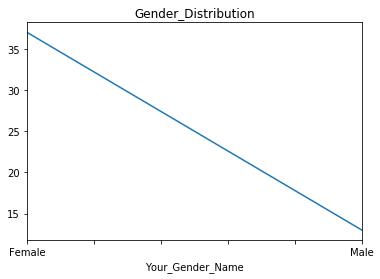

In [116]:
cat_data1.plot(title='Gender_Distribution')

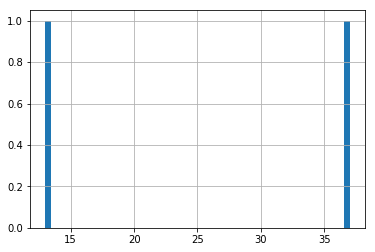

In [117]:
cat_data1.hist(bins=50)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([13. , 15.4, 17.8, 20.2, 22.6, 25. , 27.4, 29.8, 32.2, 34.6, 37. ]),
 <a list of 10 Patch objects>)

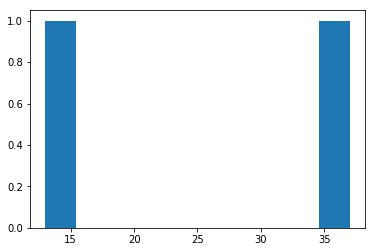

In [118]:
plt.hist(cat_data1)

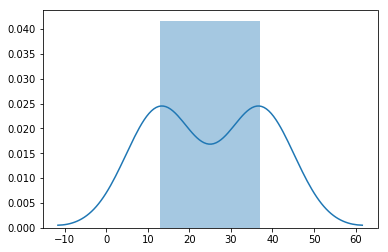

In [119]:
sns.distplot(cat_data1)

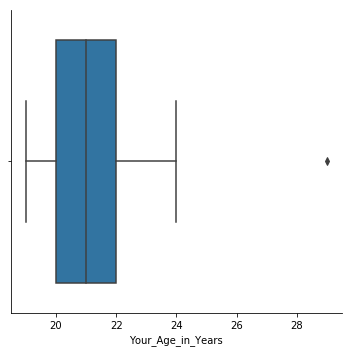

In [121]:
sns.catplot(x='Your_Age_in_Years',kind='box',data=df1)

In [91]:
df2 = df1.iloc[:,[2,4,5,6,8,13,16]]
df2.head(3)

,Your_Age_in_Years,Monthly_Cost_for_Buying_Internet_with_Mobile_Data,Monthly_Cost_for_only_Phone/Mobile_Call,"How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes",Household_Monthly_Income,How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour,How_well_could_you_manage_time_while_learning_remotely?_Consider_5_being_extremely_well_and_1_being_not_at_all
0,24,500,200,480,40000,4.0,1
1,20,1000,200,420,50000,4.0,2
2,21,1000,500,480,22000,2.0,3


In [92]:
df2.rename(columns = {'Your_Age_in_Years':'age', 'Monthly_Cost_for_Buying_Internet_with_Mobile_Data':'monthly_net_cost', 'Monthly_Cost_for_only_Phone/Mobile_Call':'monthly_call_cost', 
                              'How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes':'time_spent_sm',
                                  'Household_Monthly_Income':'income','How_much_time_do_you_spend_each_day_on_an_average_in_the_online_classes_in_Hour':'time_spent_onlineclass',
                                     'How_well_could_you_manage_time_while_learning_remotely?_Consider_5_being_extremely_well_and_1_being_not_at_all':'remote_learning_time_management'}, inplace = True)
df2.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,age,monthly_net_cost,monthly_call_cost,time_spent_sm,income,time_spent_onlineclass,remote_learning_time_management
0,24,500,200,480,40000,4.0,1
1,20,1000,200,420,50000,4.0,2
2,21,1000,500,480,22000,2.0,3


<p>df2 Dataframe contains only numeric data</p>

<h3>Correlogram<h3>

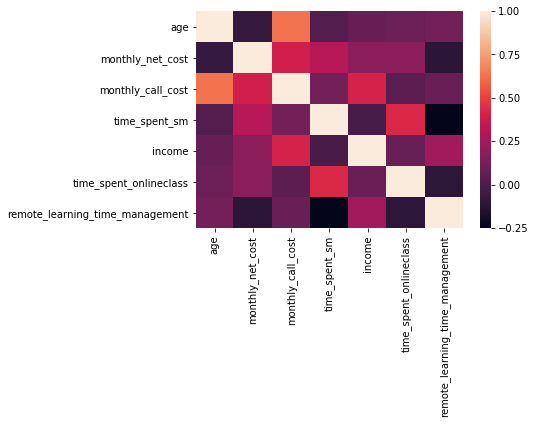

In [93]:
import seaborn as sns
correlation=df2.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)


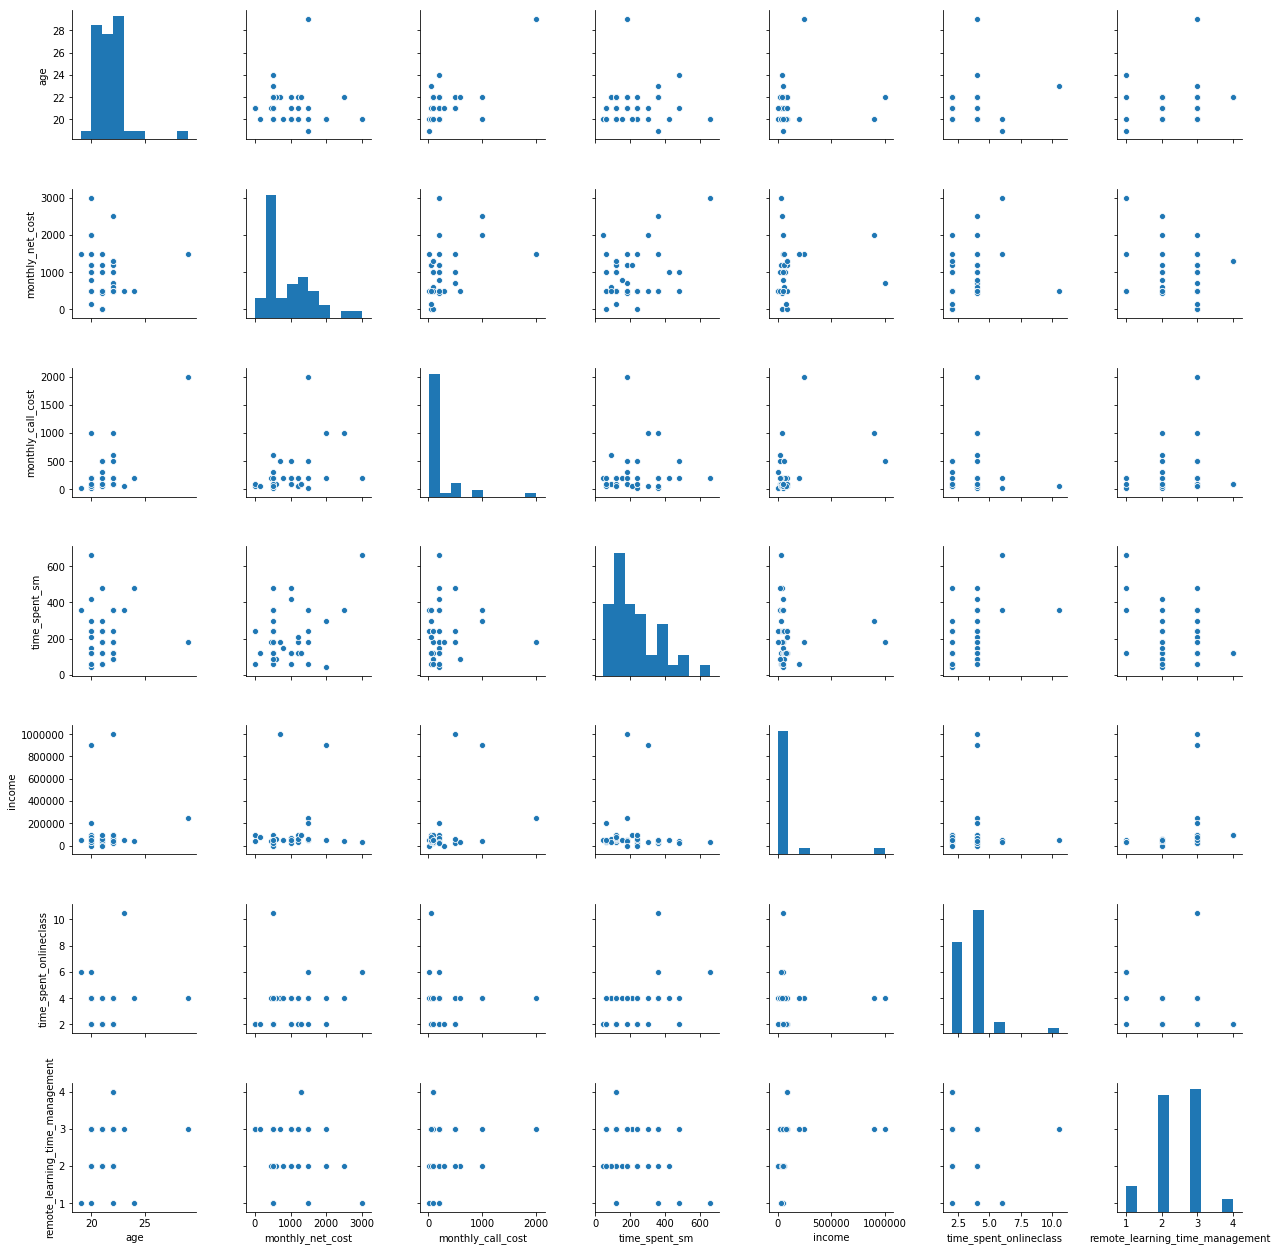

In [94]:
sns.pairplot(df2)

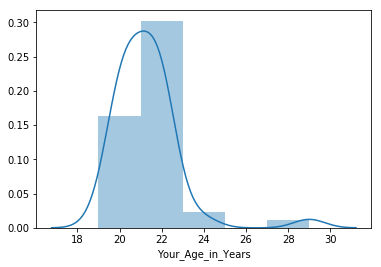

In [95]:
sns.distplot(df1['Your_Age_in_Years'],bins=5)

(array([ 1., 13., 12., 14.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.]),
 <a list of 10 Patch objects>)

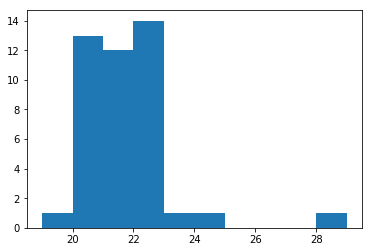

In [96]:
import matplotlib.pyplot as plt
plt.hist(df1['Your_Age_in_Years'],bins=10)

In [97]:
##check relation between 2 numerical variables and one categorical target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


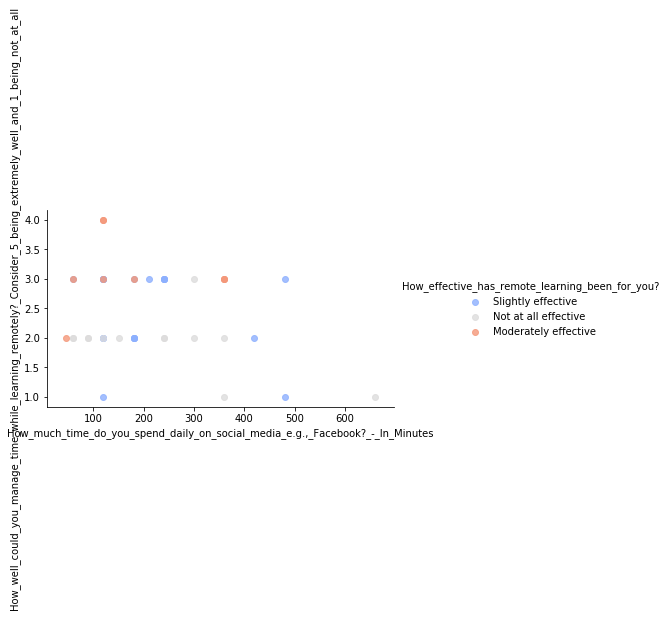

In [98]:
sns.lmplot(x='How_much_time_do_you_spend_daily_on_social_media_e.g.,_Facebook?_-_In_Minutes',y='How_well_could_you_manage_time_while_learning_remotely?_Consider_5_being_extremely_well_and_1_being_not_at_all',data=df1, hue='How_effective_has_remote_learning_been_for_you?', palette='coolwarm', fit_reg=False, size=6, aspect=1)

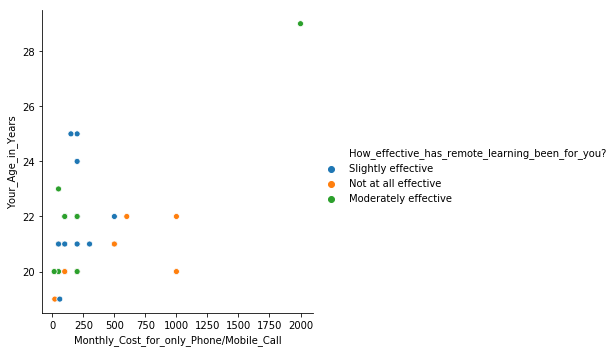

In [99]:
sns.relplot(x='Monthly_Cost_for_only_Phone/Mobile_Call',y='Your_Age_in_Years',hue='How_effective_has_remote_learning_been_for_you?',data=data)

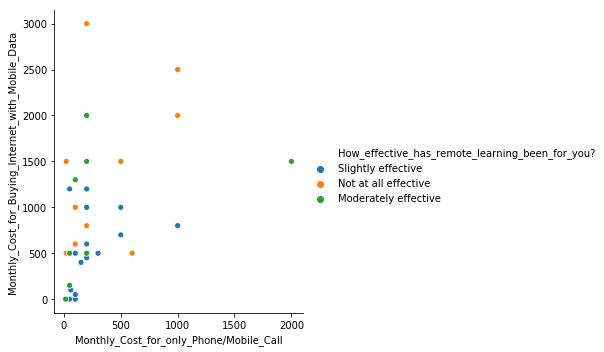

In [100]:
sns.relplot(x='Monthly_Cost_for_only_Phone/Mobile_Call',y='Monthly_Cost_for_Buying_Internet_with_Mobile_Data',hue='How_effective_has_remote_learning_been_for_you?',data=data)

<h1>K-Means Clustering</h1>

<p>In order to implement K-Means clustering, the numeric dimensions will be seperated.
Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude<p>

In [101]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6
count,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,-3.253212e-16,-1.000492e-16,2.840105e-17,-1.032766e-17,4.131062e-17,2.581914e-17,2.556095e-16
std,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00
min,-1.460898e+00,-1.454693e+00,-6.691452e-01,-1.245662e+00,-5.086164e-01,-9.283487e-01,-1.988651e+00
25%,-8.198916e-01,-6.547979e-01,-4.384980e-01,-6.853747e-01,-3.534714e-01,-9.283487e-01,-6.094253e-01
50%,-1.788854e-01,-4.948189e-01,-1.501889e-01,-2.371449e-01,-2.500414e-01,3.490591e-01,-6.094253e-01
75%,4.621207e-01,4.650553e-01,-1.501889e-01,4.351999e-01,-1.466114e-01,3.490591e-01,7.698004e-01
max,4.949164e+00,3.344678e+00,5.039374e+00,3.348694e+00,4.662883e+00,4.500634e+00,2.149026e+00


<p>The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:</p>

In [102]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<p>We have initialized two clusters – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:</p>

In [103]:
# inertia on the fitted data
kmeans.inertia_

233.74482525286152

<p>Output: 233.74482525286152

We got an inertia value of almost 233. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:</p>

Text(0, 0.5, 'Inertia')

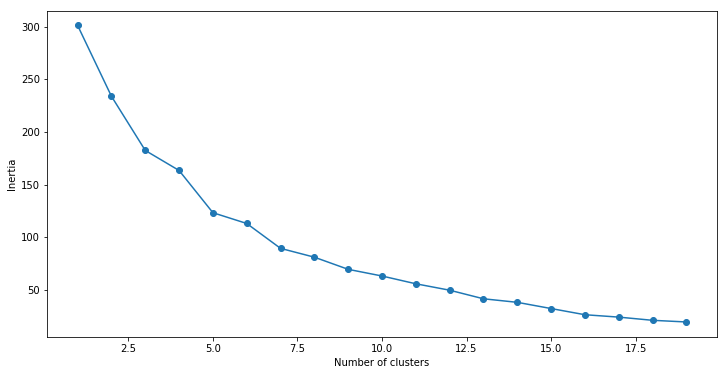

In [104]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<p>Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 7 and fit the model:</p>

In [106]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

<p>Finally, let’s look at the value count of points in each of the above-formed clusters:</p>

In [107]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    15
0    11
3    10
5     3
4     2
6     1
1     1
Name: cluster, dtype: int64